Just taking a little bit of data and following this example: https://facebook.github.io/prophet/docs/quick_start.html

In [25]:
import pandas as pd
from fbprophet import Prophet

In [26]:
df = pd.read_csv('../csv-files/One_Week_Jan2013_Interpolated.csv')
df.drop(["departure_terminal", "arrival_terminal", "scheduled_departure", "actual_departure", "Actual_Arrival", 
        "TransitTime"], axis = 1, inplace = True)

In [42]:
df.tail()

,ds,y
2011,2013-01-12 23:35:00,2567.388889
2012,2013-01-12 23:40:00,2764.111111
2013,2013-01-12 23:45:00,2960.833333
2014,2013-01-12 23:50:00,3157.555556
2015,2013-01-12 23:55:00,3354.277778


In [28]:
df.rename(columns={'timestamps':'ds', 'seconds_late':'y'}, inplace=True)

In [31]:
df.tail()

,ds,y
2011,2013-01-12 23:35:00,2567.388889
2012,2013-01-12 23:40:00,2764.111111
2013,2013-01-12 23:45:00,2960.833333
2014,2013-01-12 23:50:00,3157.555556
2015,2013-01-12 23:55:00,3354.277778


In [30]:
m = Prophet()
m.fit(df)

C:\Users\Keith\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\Keith\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [37]:
future = m.make_future_dataframe(periods=5, freq = "5min")
future.tail(10)

,ds
2011,2013-01-12 23:35:00
2012,2013-01-12 23:40:00
2013,2013-01-12 23:45:00
2014,2013-01-12 23:50:00
2015,2013-01-12 23:55:00
2016,2013-01-13 00:00:00
2017,2013-01-13 00:05:00
2018,2013-01-13 00:10:00
2019,2013-01-13 00:15:00
2020,2013-01-13 00:20:00


In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2011,2013-01-12 23:35:00,567.131865,274.929328,872.496718
2012,2013-01-12 23:40:00,573.242995,261.958745,895.237779
2013,2013-01-12 23:45:00,578.435262,258.787989,884.795068
2014,2013-01-12 23:50:00,582.684557,277.083942,886.787577
2015,2013-01-12 23:55:00,585.972003,286.806663,904.370119
2016,2013-01-13 00:00:00,588.284061,295.241728,882.859164
2017,2013-01-13 00:05:00,589.612598,295.702633,891.931920
2018,2013-01-13 00:10:00,589.954929,291.052172,877.130775
2019,2013-01-13 00:15:00,589.313808,255.901462,898.764563
2020,2013-01-13 00:20:00,587.697399,262.012222,898.458619


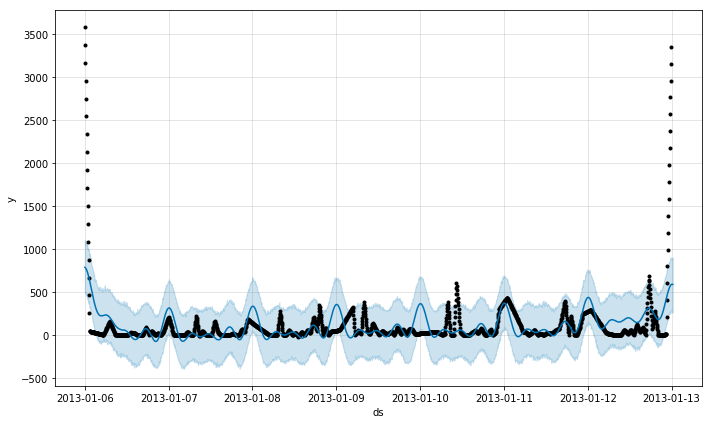

In [40]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig1 = m.plot(forecast)
fig1

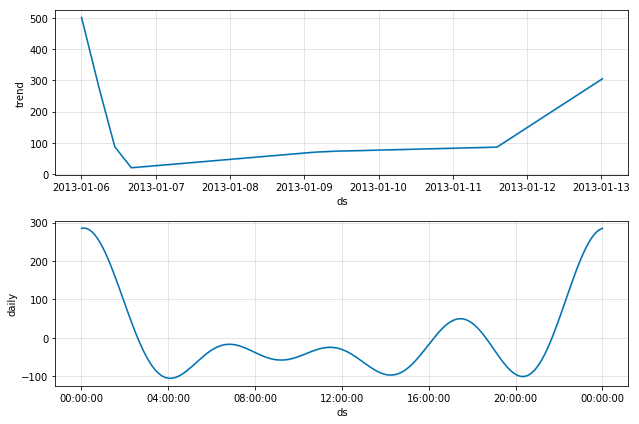

In [41]:
fig2 = m.plot_components(forecast)
fig2

Now I want to save this model and be able to load it back in. Following <a href = "https://github.com/facebook/prophet/issues/725">this</a>.

In [13]:
import pickle
pkl_path = "fb-prophet-1.pkl"

with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)
    
#forecast.to_pickle("path/to/data/forecast.pkl")

In [14]:
with open(pkl_path, 'rb') as f:
    m_2 = pickle.load(f)

In [17]:
forecast_2 = m_2.predict(future)
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01 00:55:00,323.791963,-97.903009,778.040368
1,2013-01-01 05:20:00,147.733614,-303.744361,594.829602
2,2013-01-01 07:55:00,457.235820,32.011580,896.920449
3,2013-01-01 08:45:00,494.945624,50.558390,932.719334
4,2013-01-01 09:40:00,453.310007,2.501714,887.425349
5,2013-01-01 11:30:00,231.885397,-226.552290,646.075571
6,2013-01-01 12:20:00,166.034240,-269.214238,589.796911
7,2013-01-01 13:10:00,161.837010,-258.707681,626.140477
8,2013-01-01 14:05:00,222.012496,-205.546349,649.531640
9,2013-01-01 14:55:00,305.109513,-139.600503,755.363561
